<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/eventos-aleatorios/3.%20Aplicar%20conceptos%20de%20probabilidad%20a%20eventos%20aleatorios/10_Estandarizaci%C3%B3n%2C_covarianza_y_correlaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estandarización, covarianza y correlación

## Configuramos notebook

In [2]:
#Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

bicicletas-compartidas.csv  iris-data.csv   __pycache__/
datos_profesora.py          juego-azar.csv


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos


In [ ]:
df_iris = pd.read_csv('iris-data.csv')
df_iris = df_iris.drop(columns=['Unnamed: 0'])

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Estandarizar

La correlacion y la covarianza, son dos medidas que nos van a permitir entender la relacion entre dos variables aleatorias, **x** y **y**. Pero para hablar de ellas debemos entender el concepto de estandarizacion.


Estandarizar una variable consiste en transformar una distribución N(µ, σ) en otra normal N(0, 1). La transformación consiste en:

1. Trasladar o centrar, es decir, hacer la media cero (µ = 0).
2. Reducir (contraer o dilatar), es decir, hacer la desviación estandar o típica uno (σ = 1).

Para ellos se aplica el cambio de variable: 

Z = (X - µ) / σ

El proceso lo podemos ver en la imagen: 


![estandarizar](https://imgur.com/iBCknNq.png)

Estandarizar tambien nos permite hacer que la variable sea adimensional, es decir, que no tengan dimensión o que los datos sean independientes de la escala escogida. 

In [7]:
df_iris.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [8]:
df_iris.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

Nos quedaremos con el largo del petalo

In [10]:
y_largo_petalo = df_iris['lar.petalo']

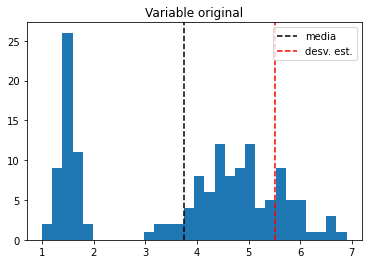

In [16]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y_largo_petalo, bins = 30)
ax.axvline(x = np.mean(y_largo_petalo), color='black', label='media', linestyle='--')
ax.axvline(x = np.mean(y_largo_petalo) + np.std(y_largo_petalo), color='red', label='desv. est.', linestyle='--')
ax.legend()

Es una distribucion bimodal, esto nos da un vistazo que la variable esta categorizando dos poblaciones diferentes. En nuestro caso sabemos que son 3 por ``` df_iris.tipo_flor.value_counts() ```. 

Luego de haber hecho la grafica anterior, estandaricemos:



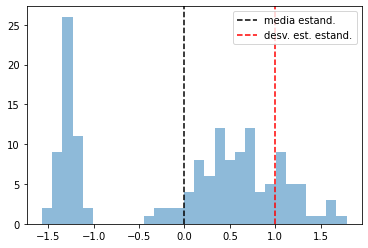

In [18]:
fig, ax = plt.subplots()
# cambio de variable para estandarizar
z = (y_largo_petalo - np.mean(y_largo_petalo)) / np.std(y_largo_petalo)

# Estandarizado
ax.hist(z, bins = 30, alpha = 0.5)
ax.axvline(x = np.mean(z), color='black', label='media estand.', linestyle='--')
ax.axvline(x = np.mean(z) + np.std(z), color='red', label='desv. est. estand.', linestyle='--')

ax.legend()

Comparemos la original y la estandarizada. 

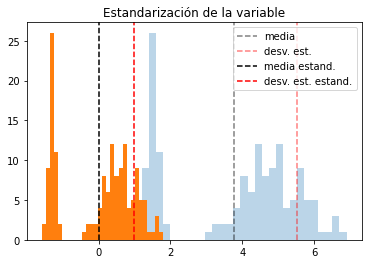

In [22]:
fig, ax = plt.subplots()
# cambio de variable para estandarizar
z = (y_largo_petalo - np.mean(y_largo_petalo)) / np.std(y_largo_petalo)


ax.set_title('Estandarización de la variable')
# Original
ax.hist(y_largo_petalo, bins = 30, alpha = 0.3)
ax.axvline(x = np.mean(y_largo_petalo), color='black', label='media', linestyle='--', alpha = 0.5)
ax.axvline(x = np.mean(y_largo_petalo) + np.std(y_largo_petalo), color='red', label='desv. est.', linestyle='--', alpha = 0.5)

# Estandarizado
ax.hist(z, bins = 30)
ax.axvline(x = np.mean(z), color='black', label='media estand.', linestyle='--')
ax.axvline(x = np.mean(z) + np.std(z), color='red', label='desv. est. estand.', linestyle='--')

ax.legend()

## Covarianza y correlación

Ambas miden el valor de la relación lineal entre dos variables aleatorias X e Y. 

[Covarianza](https://es.wikipedia.org/wiki/Covarianza)
- Mide la dirección (signo) de la relación entre X e Y. 
- Sirve para magnitudes no estandarizadas. 
- El rango de la covarianza es Con(X) = [-∞, ∞].

[Correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n):
- Mide la dirección (signo) de la relación entre X e Y.
- Mide la fuerza (cuando está estandarizada). 
- El rango de la correlación es Corr(X) = [-1, 1].
- Relación lineal perfecta cuando es -1 o 1.

![formulas](https://imgur.com/mWWC1F7.png)

![correlacion1](https://imgur.com/EK3BD7f.png)
![correlacion2](https://imgur.com/525NJVa.png)

Veamos ahora la relación entre dos variables, estas son: 
- largo de petalo
- largo de sepalo

Text(0, 0.5, 'lar.setalo')

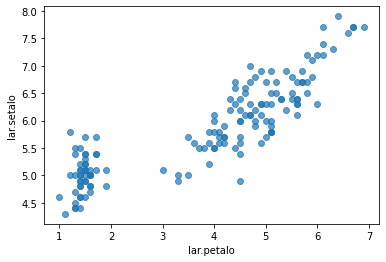

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = df_iris['lar.petalo'], y = df_iris['lar.sepalo'], alpha=0.7)
ax.set_xlabel('lar.petalo')
ax.set_ylabel('lar.setalo')


Veamos la covarianza:

In [29]:
np.cov(df_iris['lar.petalo'], df_iris['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

La relación puntual de las dos variables son las esquinas inferior izquierda y superior derecha.

Sabemos que la relación es positiva, y como vimos en el gráfico, efectivamente es asi, tenemos una relación positiva de una variable respesto a la otra. Si una aumenta la otra tambien, pero no tenemos la fuerza de estas variables. Esto último lo obtenemos con la correlación. Tenemos varios tipos de correlación, estudiaremos 2.  

[Coeficiente de correlación de Spearman](https://es.qwe.wiki/wiki/Spearman%27s_rank_correlation_coefficient) evalúa las relaciones monótonas (lineales o no).

In [33]:
df_iris.corr(method = 'spearman')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


Vemoas que tiene una correlación de spearman de 0.88 entre largo del petalo y largo de sepalo

[Coeficiente de correlación de Pearson](https://es.qwe.wiki/wiki/Pearson_correlation_coefficient) evalúa las relaciones lineales.

In [34]:
df_iris.corr(method = 'pearson')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.117570,0.871754,0.817941,0.782561
anc.sepalo,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
lar.petalo,0.871754,-0.428440,1.000000,0.962865,0.949035
anc.petalo,0.817941,-0.366126,0.962865,1.000000,0.956547
tipo_flor,0.782561,-0.426658,0.949035,0.956547,1.000000


Vemoas que tiene una correlación de spearman de 0.87 entre largo del petalo y largo de sepalo

Comparación entre coeficiente de Searman y Pearson:

![searman-pearson-1](https://upload.wikimedia.org/wikipedia/commons/4/4e/Spearman_fig1.svg)

Se obtiene una correlación de Spearman de 1 cuando las dos variables que se comparan están relacionadas monótonamente, incluso si su relación no es lineal. Esto significa que todos los puntos de datos con valores de x mayores que los de un punto de datos dado también tendrán valores de y mayores. Por el contrario, esto no da una correlación de Pearson perfecta.

![searman-pearson-2](https://upload.wikimedia.org/wikipedia/commons/6/67/Spearman_fig3.svg)

La correlación de Spearman es menos sensible que la correlación de Pearson a valores atípicos fuertes que se encuentran en las colas de ambas muestras. Esto se debe a que la rho de Spearman limita el valor atípico al valor de su rango.

![searman-pearson-3](https://upload.wikimedia.org/wikipedia/commons/8/80/Spearman_fig2.svg)

Cuando los datos están distribuidos aproximadamente elípticamente y no hay valores atípicos prominentes, la correlación de Spearman y la correlación de Pearson dan valores similares.

[El coeficiente de correlación de rango de Kendall](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_rango_de_Kendall), comúnmente conocido como coeficiente τ de Kendall (con la letra griega τ, tau), es una estadística utilizada para medir la asociación ordinal entre dos cantidades medidas. Se usa como estadística de prueba en una prueba de hipótesis estadística para establecer si dos variables pueden considerarse como dependientes estadísticamente.

In [35]:
df_iris.corr(method = 'kendall')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.670444,-0.337614,0.822911,0.839687,1.000000


## Heatmap de las correlaciones

In [36]:
corr_spearman = df_iris.corr(method = 'spearman')
corr_pearson = df_iris.corr(method = 'pearson')
corr_kendall = df_iris.corr(method = 'kendall')

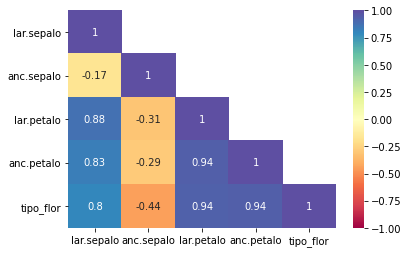

In [43]:
# Spearman
current_corr = corr_spearman # Guardo el tipo de correlacion
mask = np.zeros_like(current_corr, dtype = np.bool)
mask[np.triu_indices(len(current_corr), 1)] = True

sns.heatmap(current_corr, xticklabels=current_corr.columns, yticklabels=current_corr.columns,
            vmin = -1, vmax = 1, cmap='Spectral', annot=True, mask = mask)

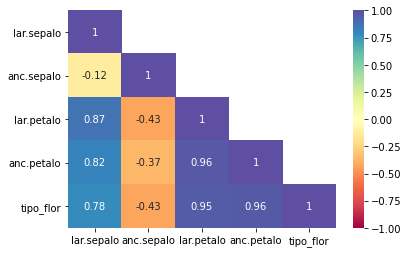

In [44]:
# Pearson
current_corr = corr_pearson # Guardo el tipo de correlacion
mask = np.zeros_like(current_corr, dtype = np.bool)
mask[np.triu_indices(len(current_corr), 1)] = True

sns.heatmap(current_corr, xticklabels=current_corr.columns, yticklabels=current_corr.columns,
            vmin = -1, vmax = 1, cmap='Spectral', annot=True, mask = mask)

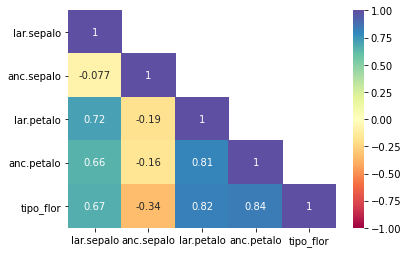

In [46]:
# Kendall
current_corr = corr_kendall # Guardo el tipo de correlacion
mask = np.zeros_like(current_corr, dtype = np.bool)
mask[np.triu_indices(len(current_corr), 1)] = True

sns.heatmap(current_corr, xticklabels=current_corr.columns, yticklabels=current_corr.columns,
            vmin = -1, vmax = 1, cmap='Spectral', annot=True, mask = mask)